# Set up an IBM Quantum channel

In [29]:
token = "your-token-here"

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [ ]:
QiskitRuntimeService.save_account(
    token=token,
    channel="ibm_quantum",           # `channel` distinguishes between different account types
    # overwrite= True
)

In [2]:
# Load saved credentials
service = QiskitRuntimeService()

In [3]:
backends = service.backends()
backends

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

# Run an experiment

In [4]:
from qiskit import QuantumCircuit

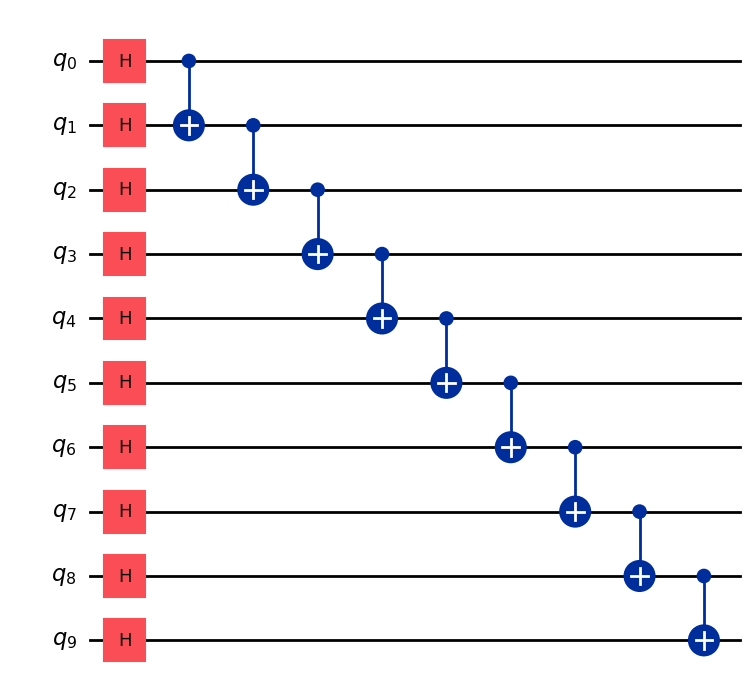

In [32]:
 # Create empty circuit
circuit = QuantumCircuit(10)
for i in range(10):
    circuit.h(i)
for i in range(9):
    circuit.cx(i,i+1)
circuit.draw('mpl')

In [33]:
backend = service.least_busy(operational=True, simulator=False)

In [39]:
print('Device Name: ', backend.name, '\n')

print('Number of Qubits: ' ,backend.num_qubits, '\n')

print('Gates or Operation Supported: ', backend.operation_names, '\n')

Device Name:  ibm_sherbrooke 

Number of Qubits:  127 

Gates or Operation Supported:  ['switch_case', 'if_else', 'reset', 'x', 'sx', 'delay', 'for_loop', 'ecr', 'measure', 'rz', 'id'] 



In [52]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

In [34]:
pass_manager = generate_preset_pass_manager(backend = backend, optimization_level=3)    # Transpilation
isa_circuit = pass_manager.run(circuit)                                                 # ISA: Instruction Set Architecture

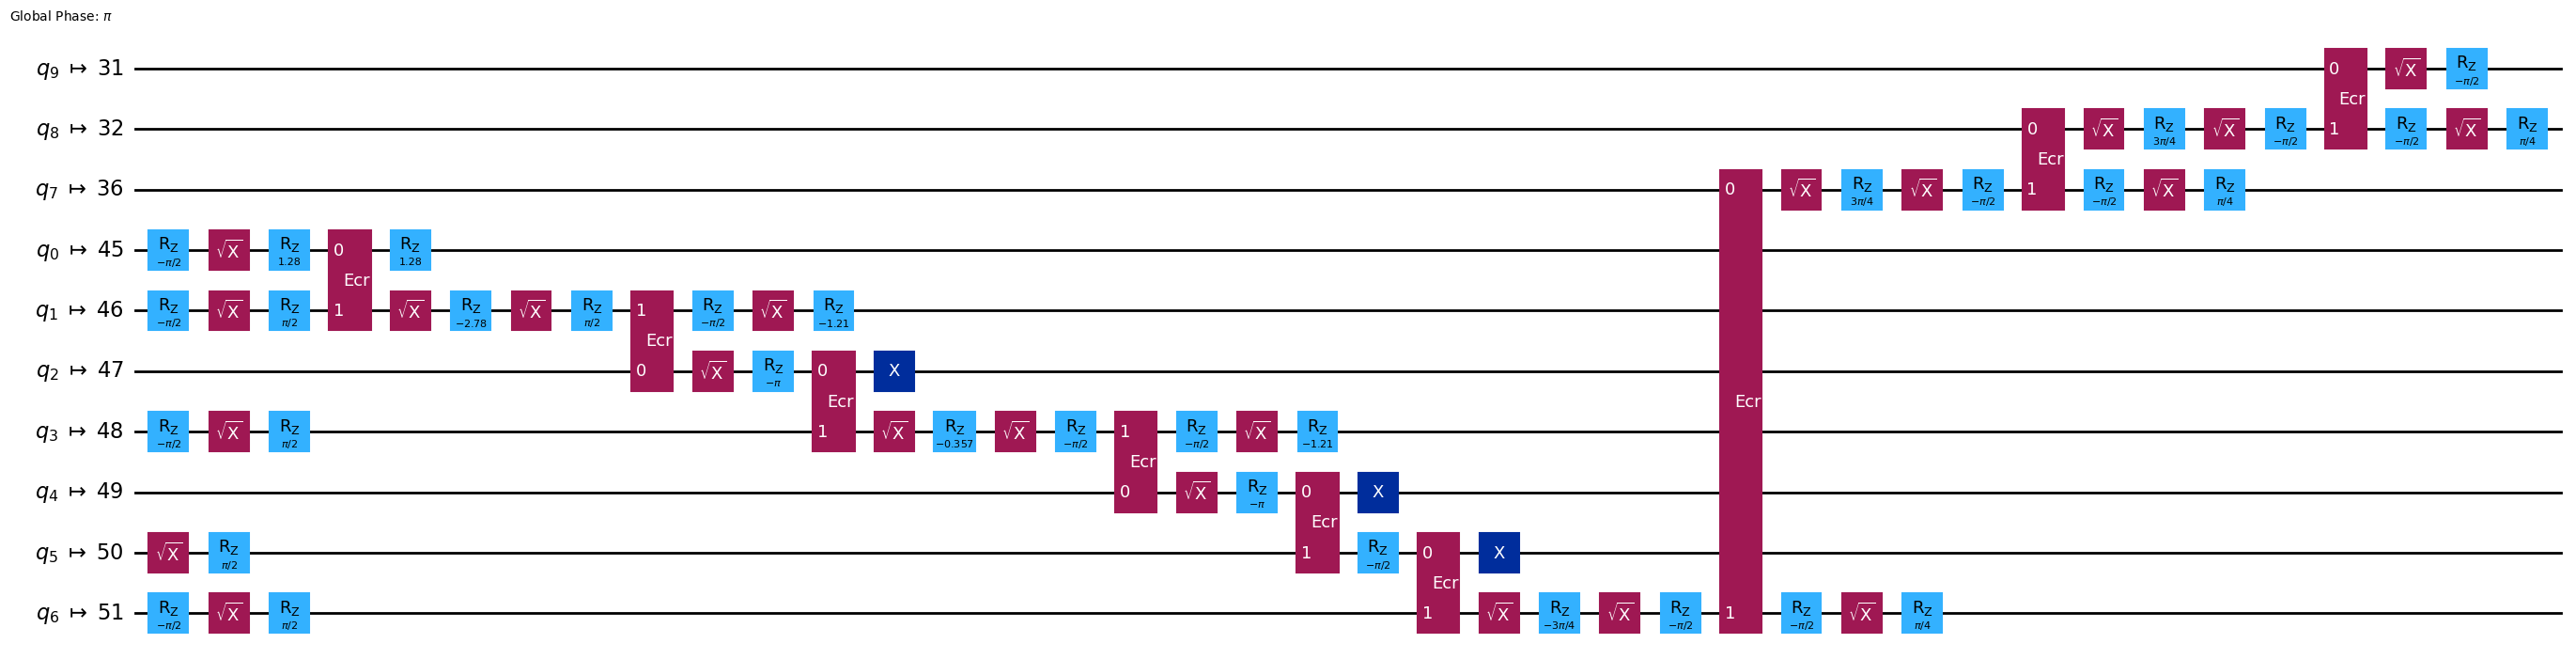

In [35]:
isa_circuit.draw('mpl', fold =-1, idle_wires= False)

In [41]:
from qiskit.quantum_info import SparsePauliOp
observable  = SparsePauliOp(['Z'*10], [1])
observable

SparsePauliOp(['ZZZZZZZZZZ'],
              coeffs=[1.+0.j])

In [48]:
layout = isa_circuit.layout
print(layout)

TranspileLayout(initial_layout=Layout({
46: Qubit(QuantumRegister(10, 'q'), 1),
47: Qubit(QuantumRegister(10, 'q'), 2),
45: Qubit(QuantumRegister(10, 'q'), 0),
48: Qubit(QuantumRegister(10, 'q'), 3),
49: Qubit(QuantumRegister(10, 'q'), 4),
50: Qubit(QuantumRegister(10, 'q'), 5),
51: Qubit(QuantumRegister(10, 'q'), 6),
36: Qubit(QuantumRegister(10, 'q'), 7),
32: Qubit(QuantumRegister(10, 'q'), 8),
31: Qubit(QuantumRegister(10, 'q'), 9),
0: Qubit(QuantumRegister(117, 'ancilla'), 0),
1: Qubit(QuantumRegister(117, 'ancilla'), 1),
2: Qubit(QuantumRegister(117, 'ancilla'), 2),
3: Qubit(QuantumRegister(117, 'ancilla'), 3),
4: Qubit(QuantumRegister(117, 'ancilla'), 4),
5: Qubit(QuantumRegister(117, 'ancilla'), 5),
6: Qubit(QuantumRegister(117, 'ancilla'), 6),
7: Qubit(QuantumRegister(117, 'ancilla'), 7),
8: Qubit(QuantumRegister(117, 'ancilla'), 8),
9: Qubit(QuantumRegister(117, 'ancilla'), 9),
10: Qubit(QuantumRegister(117, 'ancilla'), 10),
11: Qubit(QuantumRegister(117, 'ancilla'), 11),
12: 

In [50]:
isa_z_obs = observable.apply_layout(layout=layout)
isa_z_obs

SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZZZZZZIIIIIIIIZIIIZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
              coeffs=[1.+0.j])

In [54]:
pub = (isa_circuit, isa_z_obs)
estimator = Estimator(backend)
job = estimator.run([pub])

In [61]:
job_id = job.job_id()
print(f"Job ID: {job_id}")

Job ID: czkwqcnpj4bg008yyg60


In [57]:
result = job.result()
print(result)

PrimitiveResult([PubResult(data=DataBin(evs=np.ndarray(<shape=(), dtype=float64>), stds=np.ndarray(<shape=(), dtype=float64>), ensemble_standard_error=np.ndarray(<shape=(), dtype=float64>)), metadata={'shots': 4096, 'target_precision': 0.015625, 'circuit_metadata': {}, 'resilience': {}, 'num_randomizations': 32})], metadata={'dynamical_decoupling': {'enable': False, 'sequence_type': 'XX', 'extra_slack_distribution': 'middle', 'scheduling_method': 'alap'}, 'twirling': {'enable_gates': False, 'enable_measure': True, 'num_randomizations': 'auto', 'shots_per_randomization': 'auto', 'interleave_randomizations': True, 'strategy': 'active-accum'}, 'resilience': {'measure_mitigation': True, 'zne_mitigation': False, 'pec_mitigation': False}, 'version': 2})


In [75]:
retrieved_job = service.job('czkwqcnpj4bg008yyg60')
r_result = retrieved_job.result()

In [76]:
print('Expectation value: ' , r_result[0].data.evs)
print('Standard Deviation: ', r_result[0].data.stds)

Expectation value:  -0.009313154831199068
Standard Deviation:  0.024259119540170446
